In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'25',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.color':'black',
         'ytick.color':'black',
         'figure.facecolor':'white'}
pylab.rcParams.update(params)

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']         #正常顯示中文

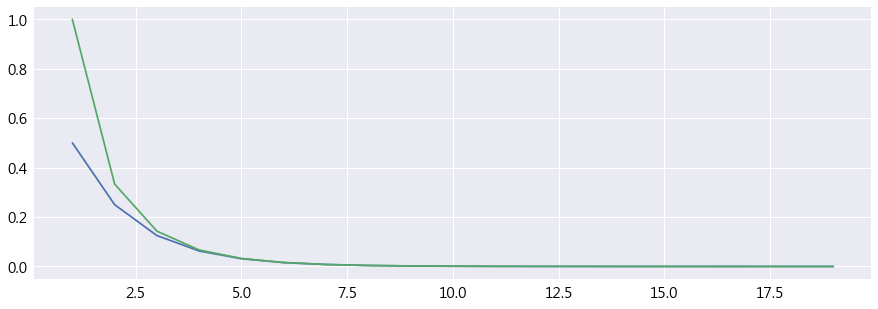

In [3]:
n = [i+1 for i in range(19)]
r = [1/(2**i-1) for i in n]
p = [2**-i for i in n]

plt.plot(n,p)
plt.plot(n,r)

In [4]:
n = 10
p = 1/(2**n-1)
x = [i+1 for i in range(1024)]
l = [(1-p)**(i+1) for i in range(1024)]

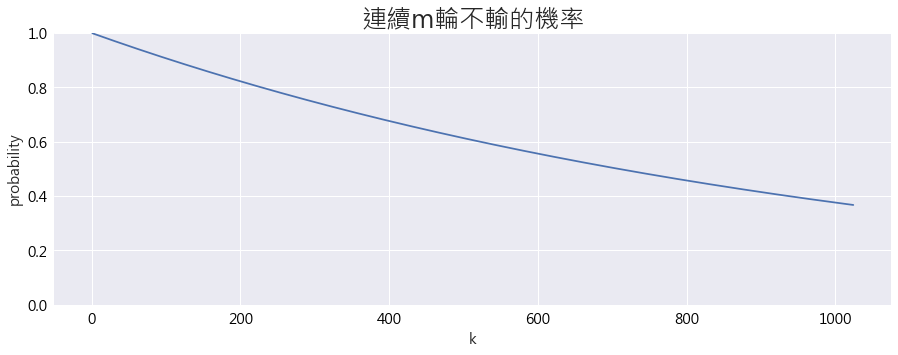

In [5]:
plt.plot(x,l) 
# plt.plot(x,l2)
plt.ylim([0, 1])
plt.title("連續m輪不輸的機率")
plt.ylabel('probability')
plt.xlabel('k');

Text(0.5, 0, 'n')

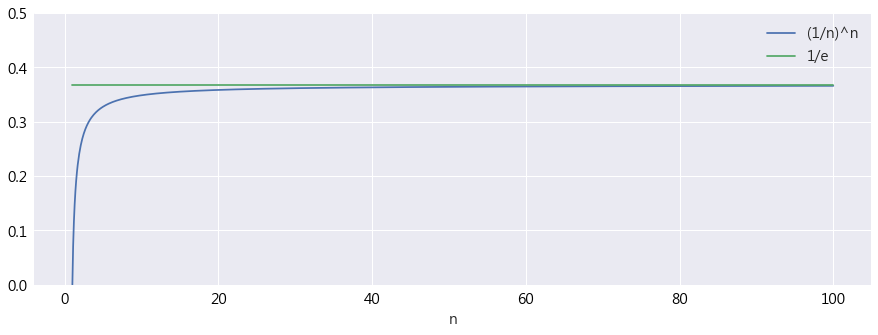

In [6]:
x = np.linspace(1,100,1000)
y1 = (1-1/x)**x
y2 = np.array([np.exp(1)**(-1) for i in range(1000)])

plt.plot(x, y1)
plt.plot(x, y2)

plt.ylim(0,0.5)

plt.legend(["(1/n)^n", "1/e"])
plt.xlabel("n")

In [7]:
n = np.array([10*(i+1)  for i in range(1000)])
times = 1/np.log2((n+1)/n)

h = np.array([0.5 for i in range(1000)])
p = (1-1/n)**times

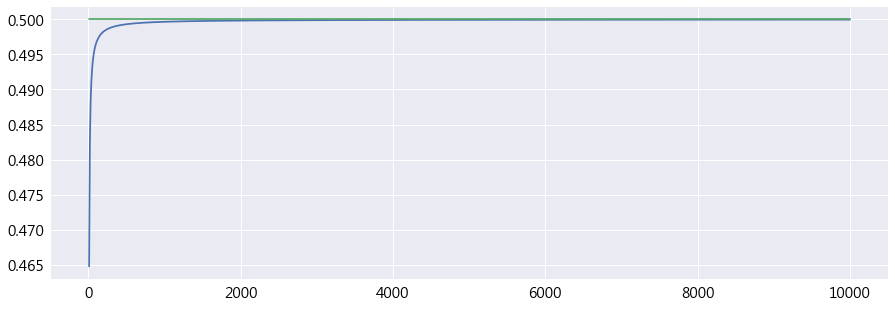

In [8]:
plt.plot(n, p)
plt.plot(n, h)

In [9]:
# !pip install yahoo_fin

In [10]:
import yfinance as yf

start_date = '2012-01-01'
end_date = '2021-12-31'
stock_no = '0050.TW'

stock = yf.Ticker(stock_no)
stock_data = stock.history(start = start_date, end = end_date)

In [11]:
stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-02,49.450001,49.599998,48.939999,49.060001,11331613,0,0
2012-01-03,49.500000,49.950001,49.400002,49.700001,19461977,0,0
2012-01-04,49.900002,50.150002,49.779999,50.000000,23080541,0,0
2012-01-05,50.099998,50.150002,49.910000,50.150002,21097923,0,0
2012-01-06,50.099998,50.250000,49.849998,50.000000,28343880,0,0
...,...,...,...,...,...,...,...
2021-12-24,143.000000,143.600006,142.949997,143.050003,12525381,0,0
2021-12-27,143.199997,144.250000,143.100006,144.149994,6512199,0,0
2021-12-28,144.300003,145.300003,144.300003,145.300003,22455995,0,0


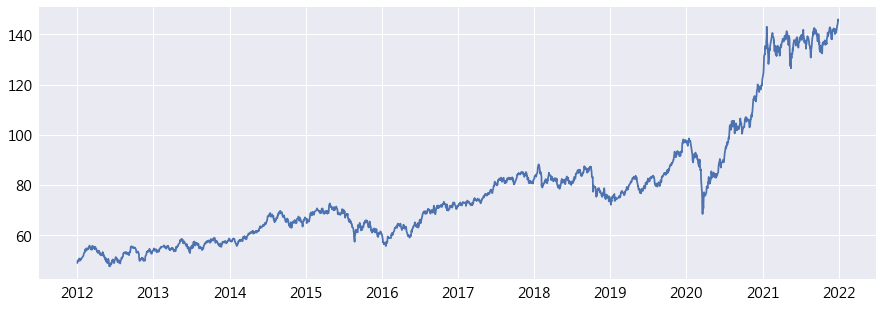

In [12]:
p = stock_data['Close']
plt.plot(p)

In [13]:
#Main
class TestMarket():
    def __init__(self, balance = 0, hold_quant = 0,
                 step = 0, max_step = 0, max_loss = 0,
                 round_ = 0, round_net = 0, round_cost = 0,
                 price_list = [], max_hold_quant = 0, 
                 period = 0, max_hold_period = 0, end_period = 'default',
                 record = 'default', log = []):
        #cash balance
        self.balance = balance 
        #holding share quant
        self.hold_quant = hold_quant
        #number of rounds
        self.round = round_
        #number of periods
        self.period = period
        
        #max step of the process
        self.max_step = max_step
        #max needed money of the process
        self.max_loss = max_loss
        #max hold quant
        self.max_hold_quant = max_hold_quant
        
        #number of steps
        self.step = step      
        #net value of the round, which is used to discriminate what to do next
        self.round_net = round_net
        #each round cost money
        self.round_cost = round_cost
        
        #history price
        self.price_list = list(price_list)
        #recorded by period,by round,or neither
        #'None', 'period', 'round'
        self.record = record
        self.log = log
        
                
        #end period
        if end_period == 'default':
            self.end_period = len(self.price_list)-20
        else:
            self.end_period = end_period
    
    
    #update price_list
    def update_price(self, price_list): 
        p = list(price_list)
        
        #drop out the first price in the price list, which means one day passed.
        p.pop(0)
        self.period += 1
        
        #update param
        self.price_list = p
    
    #buy stock
    def buy(self, price, quant):
        self.balance = self.balance - price*quant
        self.round_cost += price*quant
        self.hold_quant += quant
        
        #update max hold quant
        if self.hold_quant > self.max_hold_quant:
            self.max_hold_quant = self.hold_quant
            self.max_hold_period = self.period
    
    #sell stock
    def sell(self, price, quant):
        self.balance = self.balance + price*quant        
        self.hold_quant -= quant
#         self.round_cost -= price*quant
        
    #sell out all holding shares
    def martin_win(self):
        #add one step
        self.step += 1
        
        #get price
        p = self.price_list
        
        #sell out all holding quant and get cash
        #We would buy a new share in the begining of next round
        sell_quant = self.hold_quant

        #selling price = p1 = price at period t+1
        p1 = p[1]
        sell_price = p1
        self.sell(sell_price, sell_quant)

        #update price list
        self.martin_update(p)

    def martin_lose(self):
        #add one step
        self.step += 1
        
        #get price
        p = self.price_list
        
        #buying price = p1 = price at period t+1
        p1 = p[1]
        buy_price = p1
        
        #買到手頭持有的share漲1%就足以打平虧損(round_net)
        #We need to hold the amount that can break-even the loss(round_net) when stock price increase 1%.
        round_net = self.round_net
        #上漲1%賺的錢 = needed_quant*p1*1% = abs(round_net)
        need_quant = abs(round_net)*100/p1
        hold_quant = self.hold_quant
        buy_quant = need_quant - hold_quant
        
        #如果上漲不到1%可能會導致所需持倉減少, 要賣的話要考慮sell()需影響round_cost
        #這裡如果需要持倉減少則先不出售
        if buy_quant>0:
            self.buy(buy_price, buy_quant)
        
        #update price list
        self.martin_update(p)
        
        #going to next round
        if self.martin_discrim():
            self.martin_win()

        else:
            self.martin_lose()
    
    
    def martin_first(self):
        #initialize round params
        self.step = 0
        self.round_net = 0
        self.round_cost = 0
        
        #add count
        self.round += 1
        
        #getting price
        p = self.price_list
        #p_t, which is today for martin_first() and martin_discrim(), but yesterday for martin_win() or martin_lose()  
        p0 = p[0]
        
        #p_t+1
        p1 = p[1]
        
        #buy one share at peroid t
        self.buy(p0, 1)
        #round_cost increase,while round_net remain
    
    
    #discriminate win or lose today so that it can decide which strategy to do next
    def martin_discrim(self):
        if self.record == 'period':
            self.record_()
        
        hold_quant = self.hold_quant
        round_cost = self.round_cost
        
        p = self.price_list      
        p1 = p[1]
        
        #calculate net value in this round
        #net = equity - cost
        round_net = p1*hold_quant - round_cost
        
        #update round_net
        self.round_net = round_net
        
        #bool for deciding to execute martin_win() or martin_lose()
        #if earning money, execute martin_win()
        return round_net > 0
        
        
    def martin_update(self,p):
        #update max step and max loss
        self.max_step = max(self.max_step,self.step) 
        #update max loss
        self.max_loss = max(self.max_loss, self.round_cost)  
        #update price list
        self.update_price(p)
    
    
    def martin(self):
        self.martin_first()

        if self.martin_discrim():
            self.martin_win()

        else:
            self.martin_lose()
            
        if self.record == 'round':
            self.record_()
                    
    
    def record_(self): #如果要紀錄每期結果而非每輪結果的話要在martin_win跟martin_lose裡面call這個func
        d = {
              'round':self.round,
              'period':self.period,
              'hold_quant':self.hold_quant,
              'step':self.step,
              'price': self.price_list[0],       
              'balance': self.balance,      
              'round_step': self.step,        
              'max_step': self.max_step,           
              'max_hold': self.max_hold_quant,
              'max_loss': self.max_loss,
              'round_cost':self.round_cost
        }
        
        #沒有使用copy的話會發生一些奇怪的事，或是我們需要用if log == 'none': log = []來reset attributes
        l = self.log.copy()
        l.append(d)
        self.log = l.copy()
                 
    def clear_log(self):
        self.log = []

        
    def martin_nonstop(self):
        while self.period < self.end_period:
            self.martin()
            
            
    def pseudo_return_rate(self):
        return self.balance/self.max_loss

In [14]:
mart = TestMarket(price_list = p, record = 'period')

In [15]:
mart.martin_nonstop()

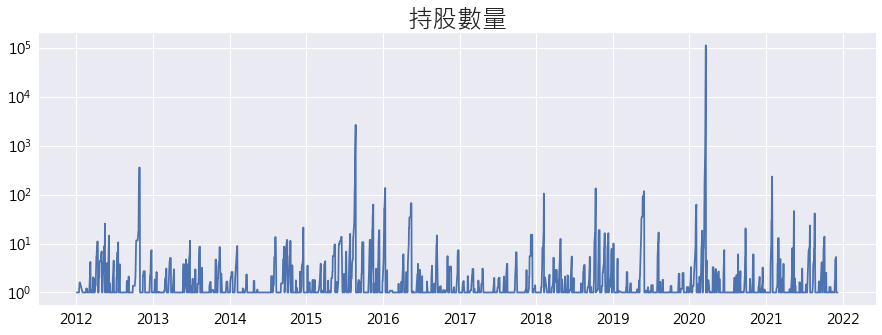

In [16]:
hq = [i['hold_quant'] for i in mart.log]
d = p.reset_index()['Date'][:len(hq)]

plt.plot(d,hq)
plt.yscale('log', base = 10)
plt.title('持股數量');

Text(0.5, 1.0, '0050走勢圖')

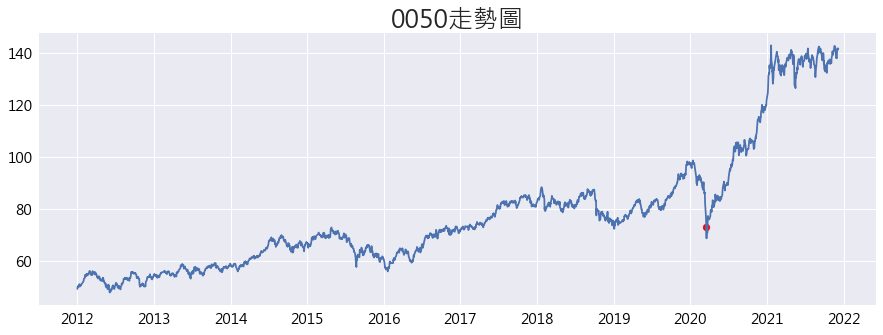

In [17]:
q = mart.max_hold_period
plt.plot(p[:mart.period])
plt.scatter(p.index[q], p[q], color = 'red');
plt.title('0050走勢圖')

In [18]:
print(f'''
        period: {mart.period}
        round: {mart.round}
        balance: {mart.balance}
        max_loss: {mart.max_loss}
        pseudo_return_rate: {mart.pseudo_return_rate()}
        overall_growth_rate: {(p.iloc[-1]-p.iloc[0])/p.iloc[0] - 1 }
        varaiance: {p.var()}       
        ''')


        period: 2435
        round: 825
        balance: 546919.504164901
        max_loss: 7847344.556703274
        pseudo_return_rate: 0.06969485030419842
        overall_growth_rate: 0.9657561338596361
        varaiance: 577.2791066043011       
        


In [19]:
#set seed for replicatible
np.random.seed(630)

In [20]:
#random draw some days
def draw_date(price_list, number, period):
    rd = np.random.randint(1, len(price_list), number) 
    return [price_list[i:i+period] for i in list(rd)]

In [21]:
#need more days to avoid the error occurs if the last round being too long
p_month = draw_date(p, 20, 50) 
p_year = draw_date(p, 20, 400)

In [22]:
rc_month = []
for pi in p_month:
    p0 = pi[0]
    mart = TestMarket(price_list = pi, end_period = 21)
    mart.martin_nonstop()
    p1 = mart.price_list[0]
    
    market_return = (p1-p0)/p0
    
    rc_month.append(
    {
        "round":mart.round,
        "period":mart.period,
        "balance":mart.balance,
        "max_loss":mart.max_loss,
        "market_return":market_return,
        "var":pi.var()
    }
    )

In [23]:
print(f'''
月操作
期間: {np.mean([i['period'] for i in rc_month])}
輪次: {np.mean([i['round'] for i in rc_month])}
類收益率: {np.mean([i['balance']/i['max_loss'] for i in rc_month])}
市場漲跌: {np.mean([i['market_return'] for i in rc_month])}
變異數: {np.mean([i['var'] for i in rc_month])}
    ''')


月操作
期間: 22.85
輪次: 8.55
類收益率: 0.022132288794184357
市場漲跌: 0.023782316602538215
變異數: 4.2333391822814
    


In [24]:
rc_year = []
for pi in p_year:
    p0 = pi[0]
    mart = TestMarket(price_list = pi, end_period = 250)
    mart.martin_nonstop()
    p1 = mart.price_list[0]
    
    market_return = (p1-p0)/p0
    
    rc_year.append(
    {
        "round":mart.round,
        "period":mart.period,
        "balance":mart.balance,
        "max_loss":mart.max_loss,
        "market_return":market_return,
        "var":pi.var()
    }
    )

In [25]:
print(f'''
年操作
期間: {np.mean([i['period'] for i in rc_year])}
輪次: {np.mean([i['round'] for i in rc_year])}
類收益率: {np.mean([i['balance']/i['max_loss'] for i in rc_year])}
市場漲跌: {np.mean([i['market_return'] for i in rc_year])}
變異數: {np.mean([i['var'] for i in rc_year])}
    ''')


年操作
期間: 251.9
輪次: 88.8
類收益率: 0.03558901840226703
市場漲跌: 0.1882892930020537
變異數: 92.16511304078684
    


In [26]:
start_date = '2021-01-01'
end_date = '2021-12-31'
stock_no = 'BTC-USD'

stock = yf.Ticker(stock_no)
BTC_data = stock.history(start = start_date, end = end_date)

In [27]:
p = BTC_data['Close']

In [28]:
mart = TestMarket(price_list = p, record = 'period')

In [29]:
mart.martin_nonstop()

In [30]:
print(f'''
        period: {mart.period}
        round: {mart.round}
        balance: {mart.balance}
        max_loss: {mart.max_loss}
        pseudo_return_rate: {mart.pseudo_return_rate()}
        overall_growth_rate: {(p.iloc[-1]-p.iloc[0])/p.iloc[0] - 1 }
        varaiance: {p.var()}       
        ''')


        period: 345
        round: 154
        balance: 20778220.72497814
        max_loss: 136622238.2779066
        pseudo_return_rate: 0.1520852021375368
        overall_growth_rate: -0.37326462512562397
        varaiance: 96725700.698123       
        


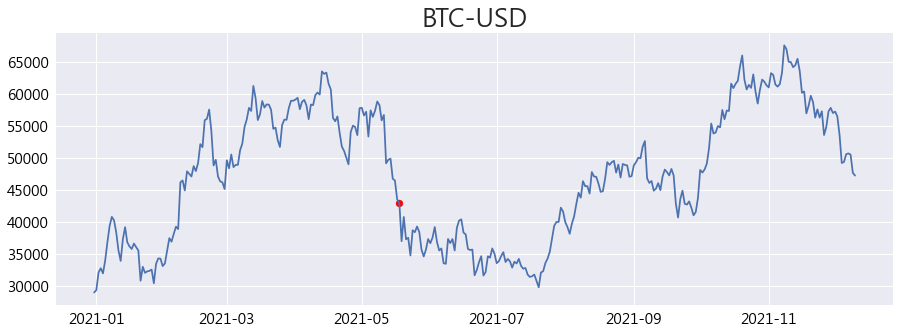

In [31]:
q = mart.max_hold_period
plt.plot(p[:mart.period])
plt.scatter(p.index[q], p[q], color = 'red');
plt.title('BTC-USD');